# WeatherPy

---

## Generating Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"appid="+weather_api_key +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Making the API request
        response = requests.get(city_url)
        
        #checking if the response status code is 200(ok)
        if response.status_code ==200:
            
            #parse the JSON and retrieve data
            city_weather = response.json()
            
            #parsing the latitude, longitude ,max temp,humidity, cloudiness,wind speed, country and date
       
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | masterton
Processing Record 3 of Set 1 | cloverdale
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | daye
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | taiohae
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | san jose del cabo
Processing Record 13 of Set 1 | selfoss
Processing Record 14 of Set 1 | zhangye
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | kolwezi
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | nukunonu
Processing Record 21 of Set 1 | belyy yar
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set

Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | hilo
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | tyukhtet
Processing Record 49 of Set 4 | qianjiang
Processing Record 0 of Set 5 | lampazos de naranjo
Processing Record 1 of Set 5 | safonovo
Processing Record 2 of Set 5 | pelabuhanratu
Processing Record 3 of Set 5 | nemuro
Processing Record 4 of Set 5 | fort bragg
Processing Record 5 of Set 5 | kupang
Processing Record 6 of Set 5 | ibra'
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | molina
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | pibor
Processing Record 11 of Set 5 | colares
Processing Record 12 of Set 5 | broken hill
Processing Record 13 of Set 5 | new norfolk
Processing Record 14 of Set 5 | padre paraiso
Processing Record 15 of Set 5 | devinuwara
Processing Record 16 of Set 5 | praia da vitoria
Processing Record 17 of Set 5 | madinat ash shamal
Processing Record 18 of Set

Processing Record 42 of Set 8 | yelizovo
Processing Record 43 of Set 8 | an nuhud
Processing Record 44 of Set 8 | can-avid
Processing Record 45 of Set 8 | kambarka
Processing Record 46 of Set 8 | bel ombre
Processing Record 47 of Set 8 | bikenibeu village
Processing Record 48 of Set 8 | mazagao
Processing Record 49 of Set 8 | batroun
Processing Record 0 of Set 9 | gbadolite
Processing Record 1 of Set 9 | pitea
Processing Record 2 of Set 9 | kingisepp
Processing Record 3 of Set 9 | kourou
Processing Record 4 of Set 9 | altar
Processing Record 5 of Set 9 | illizi
Processing Record 6 of Set 9 | aitape
Processing Record 7 of Set 9 | lompoc
Processing Record 8 of Set 9 | chilecito
Processing Record 9 of Set 9 | riacho de santana
Processing Record 10 of Set 9 | panji
Processing Record 11 of Set 9 | wad az zaki
Processing Record 12 of Set 9 | bayramaly
Processing Record 13 of Set 9 | vylkove
Processing Record 14 of Set 9 | shiguai
Processing Record 15 of Set 9 | we
Processing Record 16 of Set

Processing Record 38 of Set 12 | nguigmi
Processing Record 39 of Set 12 | coahuayana de hidalgo
Processing Record 40 of Set 12 | ploudalmezeau
Processing Record 41 of Set 12 | mil'kovo
Processing Record 42 of Set 12 | palikir - national government center
Processing Record 43 of Set 12 | kodinsk
Processing Record 44 of Set 12 | gorontalo
Processing Record 45 of Set 12 | usogorsk
Processing Record 46 of Set 12 | williams lake
Processing Record 47 of Set 12 | bacalar
Processing Record 48 of Set 12 | felipe carrillo puerto
Processing Record 49 of Set 12 | yokadouma
Processing Record 0 of Set 13 | alvaraes
Processing Record 1 of Set 13 | hotan
Processing Record 2 of Set 13 | gaozhou
Processing Record 3 of Set 13 | prince rupert
Processing Record 4 of Set 13 | alesund
Processing Record 5 of Set 13 | vohipaho
Processing Record 6 of Set 13 | kingaroy
Processing Record 7 of Set 13 | wynyard
Processing Record 8 of Set 13 | reggane
-----------------------------
Data Retrieval Complete      
-----

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,296.06,87,100,7.91,PN,1699936302
1,masterton,-40.9597,175.6575,290.86,63,70,5.91,NZ,1699936302
2,cloverdale,38.8055,-123.0172,286.89,84,52,0.45,US,1699936303
3,port mathurin,-19.6833,63.4167,298.69,77,1,3.46,MU,1699936303
4,stanley,54.8680,-1.6985,281.92,92,20,3.09,GB,1699936304


In [16]:
# Exporting the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.06,87,100,7.91,PN,1699936302
1,masterton,-40.9597,175.6575,290.86,63,70,5.91,NZ,1699936302
2,cloverdale,38.8055,-123.0172,286.89,84,52,0.45,US,1699936303
3,port mathurin,-19.6833,63.4167,298.69,77,1,3.46,MU,1699936303
4,stanley,54.8680,-1.6985,281.92,92,20,3.09,GB,1699936304


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

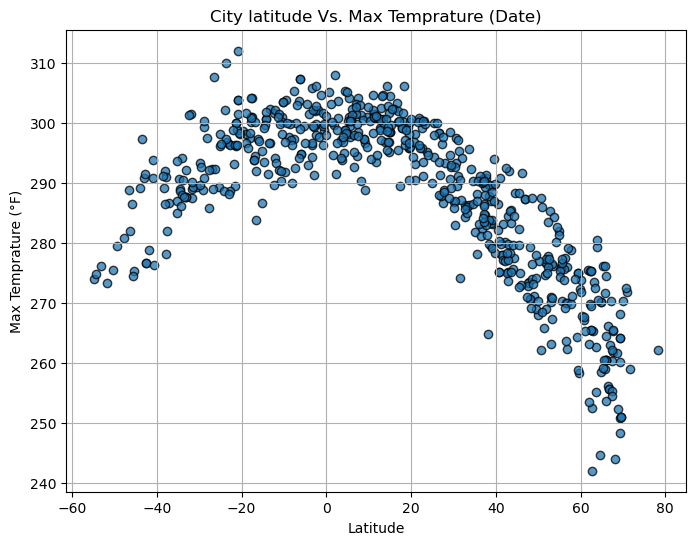

In [18]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title("City latitude Vs. Max Temprature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

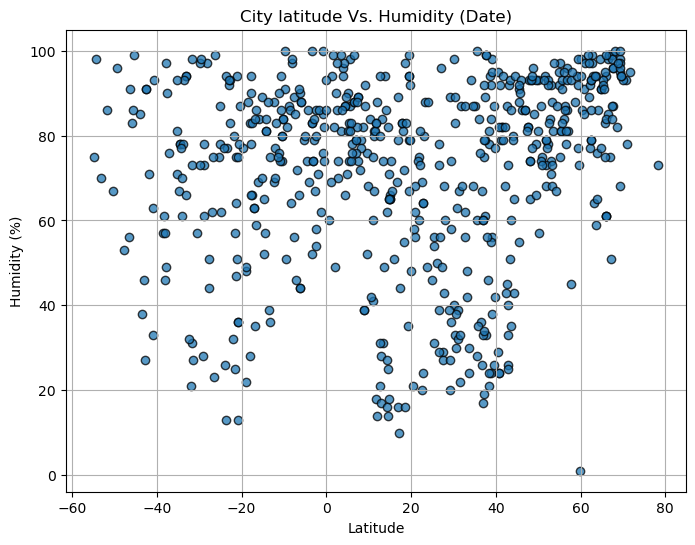

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker ="o",edgecolors= "black",alpha = 0.75)


# Incorporate the other graph properties
plt.title("City latitude Vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

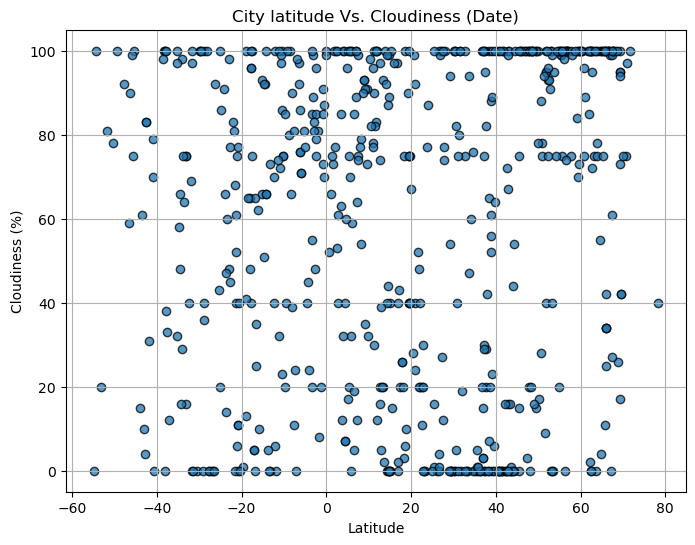

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker ="o",edgecolors= "black",alpha = 0.75)


# Incorporate the other graph properties
plt.title("City latitude Vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

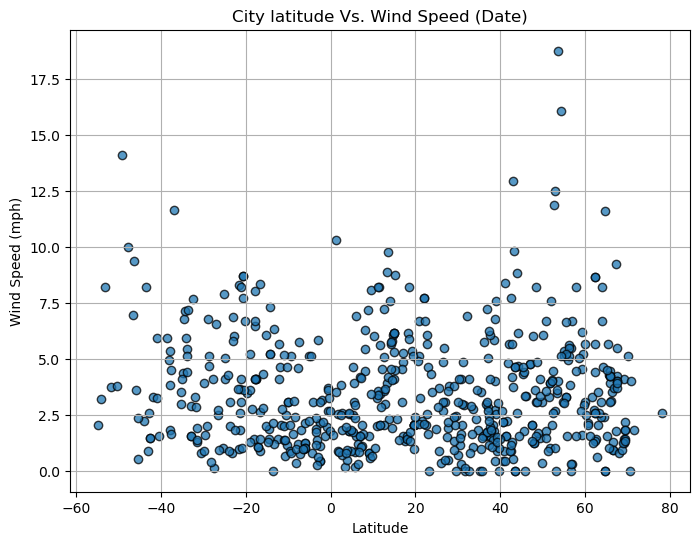

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker ="o",edgecolors= "black",alpha = 0.75)
            
# Incorporate the other graph properties
plt.title("City latitude Vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Defining a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,x_label, y_label,title, output_file):
    
    #performing linear regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
     
     #calculating the regression line
    regress_values = x_values * slope + intercept
     
     #creating the linear regression equation as a string
    line_eq = "y =" + str(round(slope,2))+"x +" + str(round(intercept,2))
     
     #creating the scatter plot
     
    plt.scatter(x_values,y_values)
     
     #plot the regression line
    plt.plot(x_values, regress_values, "r-")
     
     #Annotate the linear equation on the plot
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize = 12, color = "red")
     
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is {rvalue}")

     # Show plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filtering data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cloverdale,38.8055,-123.0172,286.89,84,52,0.45,US,1699936303
4,stanley,54.8680,-1.6985,281.92,92,20,3.09,GB,1699936304
5,aykhal,66.0000,111.5000,264.46,94,100,3.90,RU,1699936152
6,tiksi,71.6872,128.8694,259.00,95,100,1.84,RU,1699936304
7,daye,30.0833,114.9500,286.74,40,0,0.70,CN,1699936305


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filtering data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.06,87,100,7.91,PN,1699936302
1,masterton,-40.9597,175.6575,290.86,63,70,5.91,NZ,1699936302
3,port mathurin,-19.6833,63.4167,298.69,77,1,3.46,MU,1699936303
15,kolwezi,-10.7148,25.4667,290.26,94,97,0.67,CD,1699936308
21,port-aux-francais,-49.3500,70.2167,279.40,96,100,14.09,TF,1699936311


###  Temperature vs. Latitude Linear Regression Plot

In [25]:
#northern_hemi_df["Lat"].values

In [26]:
#northern_hemi_df["Max Temp"].values

The r value is -0.9020471783671383


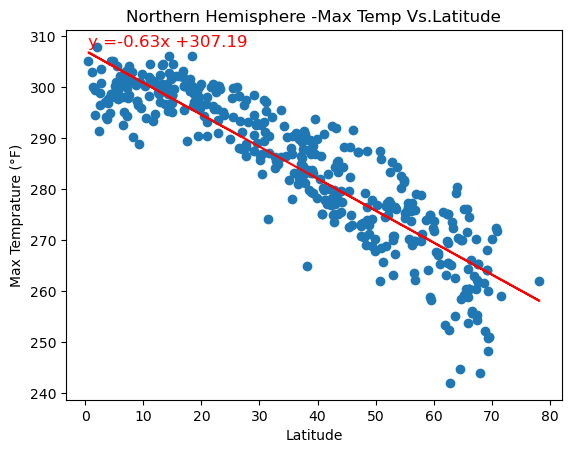

In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].values, northern_hemi_df["Max Temp"].values, "Latitude", "Max Temprature (°F)", "Northern Hemisphere -Max Temp Vs.Latitude", "output_data/NH_MaxTemp_vs_Latitude.png") 

The r value is 0.7112436502247925


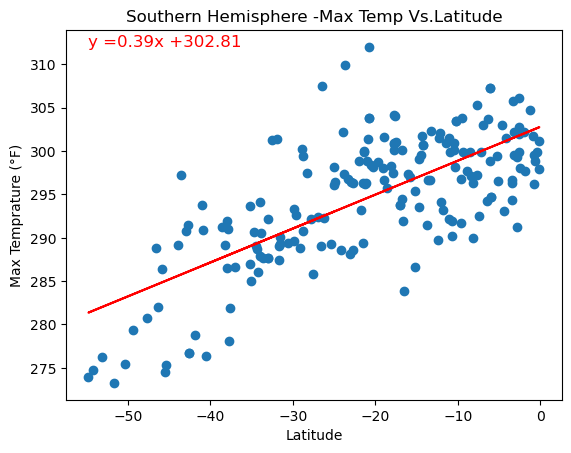

In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temprature (°F)", "Southern Hemisphere -Max Temp Vs.Latitude", "output_data/SH_MaxTemp_vs_Latitude.png") 

## Discussion about the linear relationship:
**For the Northern hemisphere** here, r value of -0.902 
(approx.) indicates a strong negative linear correlation between the latitude and Maximum Temprature . This means that as the latitude increases, the Max temprature tends to decrease. Here -0.902 is quite close to -1, suggesting that the both variables are significantly inversely related to each other.

**For the Southern Hemisphere**, r value of 0.711 (approx.) indicates a strong positive linear correlation between latitude and max temprature . This means that as one variable increases, the other variable also tends to increase. The value is quite close to 1, suggesting that there is a significant direct relationship.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.27002584231829707


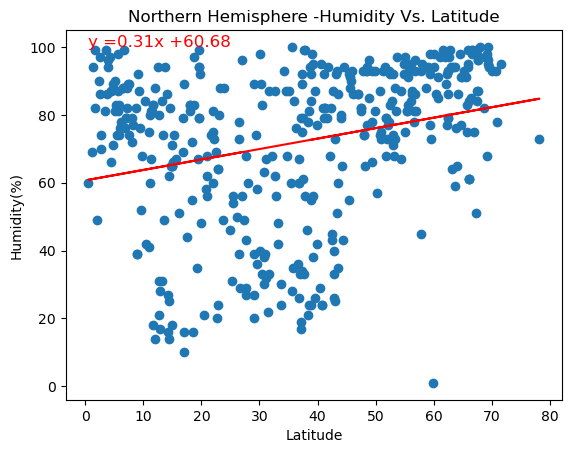

In [29]:
# Performing linear regression on Northern Hemisphere data (latitude vs. humidity)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude", "Humidity(%)", "Northern Hemisphere -Humidity Vs. Latitude",
"output_data/NH_Humidity_vs_Latitude.png")                      
                       


The r value is 0.10709741899879842


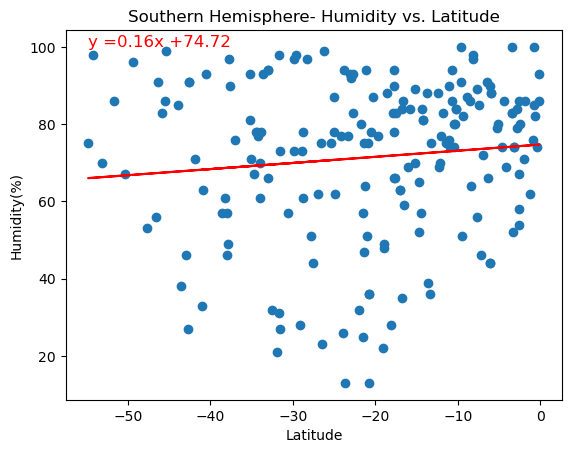

In [30]:
## Performing linear regression on Southern Hemisphere data (latitude vs. humidity)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude", "Humidity(%)", "Southern Hemisphere- Humidity vs. Latitude",
                       "output_data/SH_Humidity_vs_Latitude.png")

**Discussion about the linear relationship:**
In the northern hemisphere, An r value of 0.27 (approx.) indicates a weak positive linear correlation between latitude and humidity. This suggests that there is a slight tendency for one variable to increase as the other one increases, but the relationship is not strong.

**In the southern hemishphere**, r value of 0.107 (approx.) indicates a very weak positive linear correlation between latitude and humidity. This suggests that there is a slight tendency for one variable to increase as the other one increases, but the relationship is weak and not strongly predictive.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.1721571950413376


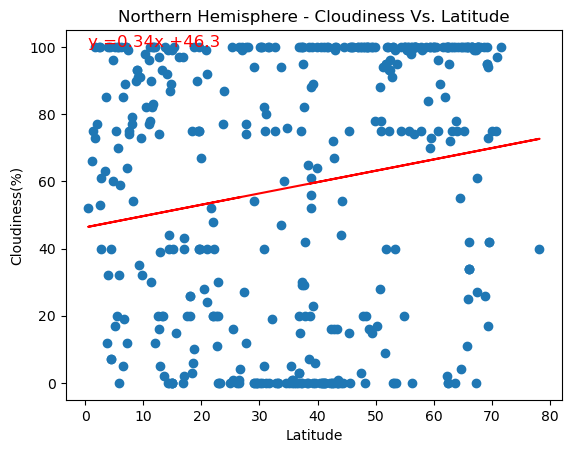

In [31]:
# Performing linear regression on Northen Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)", "Northern Hemisphere - Cloudiness Vs. Latitude",
"output_data/NH_Cloudiness_vs_Latitude.png")

                       

The r value is 0.09301299817702853


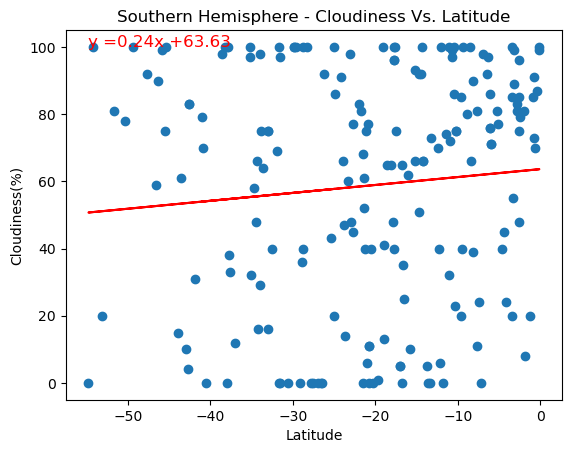

In [32]:
# Performing linear regression on Southern Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)", "Southern Hemisphere - Cloudiness Vs. Latitude",
"output_data/SH_Cloudiness_vs_Latitude.png")

**Discussion about the linear relationship:** 
**In the Northern hemisphere**, an r value of 0.172 (approx.) indicates an extremely weak positive linear relationship between latitude and cloudiness (%). This means that there is only a very slight tendency for one variable to increase as the other one increases. The relationship is so weak that it's close to being no linear relationship at all.

**In the southern hemishphere**, the r value of 0.093 (approx.) indicates a very weak positive linear correlation between latitude and cloudiness (%). This value is closer to 0 than to 1, which suggests that as one variable slightly increases, the other variable tends to increase as well, but the relationship is so weak that it may not be considered practically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.05870653733503172


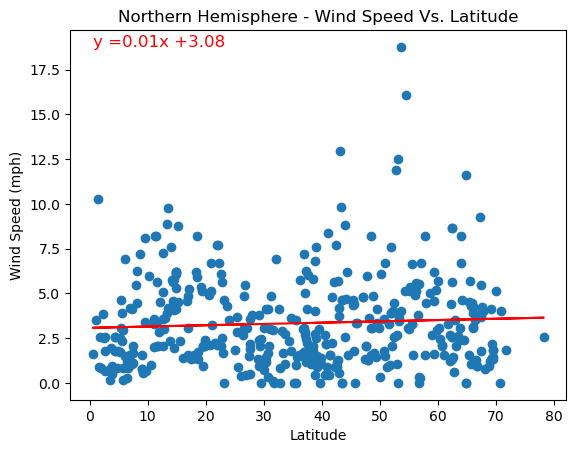

In [33]:
# Performing linear regression on Northen data (latitude vs. wind speed)
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed Vs. Latitude",
"output_data/NH_WindSpeed_vs_Latitude.png")


The r value is -0.32294752659567943


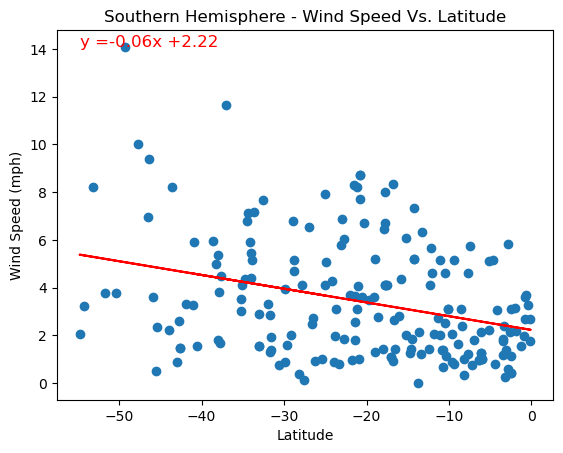

In [34]:
# Performing linear regression on Southern data (latitude vs. wind speed)
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed Vs. Latitude",
"output_data/SH_WindSpeed_vs_Latitude.png")


**Discussion about the linear relationship:
Likewise, **in the Northern hemisphere**, an r value of 0.059 (approx.) indicates a weak positive linear correlation between latitude and wind speed(mph). It signifies that there is a slight upward trend; as one variable increases, the other tends to increase as well, but the relationship is not strong.

**In the Southern hemisphere**, the r value of -0.323(approx.) indicates a moderate negative linear correlation between latitude and wind speed (mph). This means that as one variable increases, the other tends to decrease, but the relationship is not very strong.